### 一、图像数据类型及转换

在 skimage 中，一张图片就是一个简单的 nupmy 数组，数组的数据类型有很多种，相互之间可以转换。

这些数据类型及取值范围如下：

<img src="images/numpy.png" style="width:500px;height:240px;">

一张图片的像素范围是 [0，255]，因此默认的类型是 uint8，可以用如下代码查看数据类型

In [1]:
from skimage import io,data
img=data.chelsea()
print(img.dtype.name)

uint8


**特别注意：** 
- float 类型，它的范围是 [-1,1] 或 [0,1] 之间；
- 一张彩色图片转换为灰度图后，类型由 uint8 转换为 float


#### 1. uint8 转 float

In [3]:
from skimage import data,img_as_float
img=data.chelsea()    #查看数据类型
print(img.dtype.name)
dst=img_as_float(img) #转换数据类型
print(dst.dtype.name)

uint8
float64


#### 2. float 转 uint8

In [4]:
from skimage import img_as_ubyte
import numpy as np
img=np.array([0,0.5,1],dtype=float)
print(img.dtype.name)
dst=img_as_ubyte(img)
print(dst.dtype.name)

float64
uint8


/home/zhaozhao/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


**注意：** float 转为 uint8 ，有可能会造成数据的损失，因此会有警告提醒。

除了这两种最常用的转换之外，还有一些其他的类型转换，如下表：

<img src="images/float.png" style="width:400px;height:180px;">

### 二、颜色空间及其转换

除了直接转换可以改变数据类型之外，还可以通过图像的颜色空间转换来改变数据类型。

**常用的颜色空间：** 灰度空间、rgb空间、hsv空间和cmyk空间。

颜色空间转换以后，图片类型都变成了 float 类型。

所有的颜色空间转换函数，都可以放在 skimage 的 color 模块内。

**例1：** rgb 转灰度图

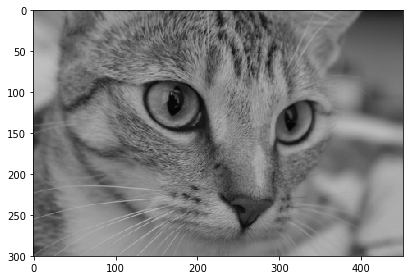

In [12]:
from skimage import io,data,color
img=data.chelsea()
gray=color.rgb2gray(img)
io.imshow(gray)
io.show()

**其他一些常用的转化：**

skimage.color.rgb2grey(rgb)   ——rgb转灰度图

skimage.color.rgb2hsv(rgb)    ——rgb转hsv

skimage.color.rgb2lab(rgb)    ——rgb转lab

skimage.color.gray2rgb(image) ——灰度图转rgb

skimage.color.hsv2rgb(hsv)    ——hsv转rgb

skimage.color.lab2rgb(lab)    ——lab转rgb

实际上，上面的所有的转换函数，都可以用一个函数来代替

**skimage.color.convert_colorspace(arr,fromspace,tospace)**

表示将 arr 从 fromspace 颜色空间转换到 tospace 颜色空间

**例2：** rgb 转 hsv

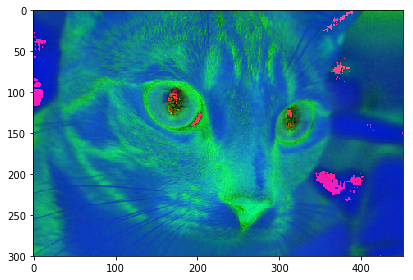

In [6]:
from skimage import io,data,color
img=data.chelsea()
hsv=color.convert_colorspace(img,'RGB','HSV')
io.imshow(hsv)
io.show()

在 color 模块的颜色空间转换函数中，还有一个比较有用的函数是：

** skimage.color.label2rgb(arr) **,可以根据标签值对图片进行着色。

以后的图片分类后的着色就可以用这个函数。

**例3：** 将 lena 图片分成三类，然后用默认颜色对三类进行着色

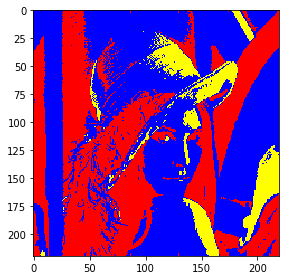

In [16]:
from skimage import io,data,color
import numpy as np
img=io.imread('images/lena.png')  #读取 lena 图片
gray=color.rgb2gray(img)
rows,cols=gray.shape
labels=np.zeros([rows,cols])
for i in range(rows):
    for j in range(cols):
        if(gray[i,j]<0.4):
            labels[i,j]=0
        elif(gray[i,j]<0.75):
            labels[i,j]=1
        else:
            labels[i,j]=2
dst=color.label2rgb(labels)
io.imshow(dst)
io.show()

**例3‘：** 将小猫图片分成三类，然后用默认颜色对三类进行着色

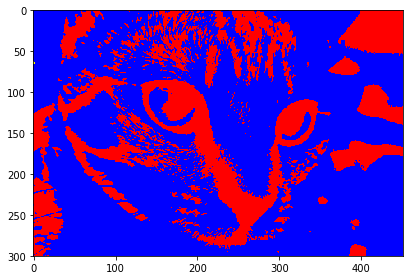

In [18]:
from skimage import io,data,color
import numpy as np
img=data.chelsea()
gray=color.rgb2gray(img)
rows,cols=gray.shape
labels=np.zeros([rows,cols])
for i in range(rows):
    for j in range(cols):
        if(gray[i,j]<0.4):
            labels[i,j]=0
        elif(gray[i,j]<0.75):
            labels[i,j]=1
        else:
            labels[i,j]=2
dst=color.label2rgb(labels)
io.imshow(dst)
io.show()